# **Data Preprocessing**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for time-series analysis
df.set_index('Date', inplace=True)

# Check data types of all columns
print(df.dtypes)

# Ensure that stock prices (Open, High, Low, Close) and Volume are in numerical format
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']] = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']].apply(pd.to_numeric)

# Verify the changes
print(df.head())


Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object
                Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Vol

**Handling Missing Values**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Interpolate missing values (linear interpolation)
df.interpolate(method='linear', inplace=True)

# Option 2: Forward fill missing values (use the last available value)
# df.fillna(method='ffill', inplace=True)

# Option 3: Backward fill missing values (use the next available value)
# df.fillna(method='bfill', inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())


Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


<ipython-input-3-dd93122f95b0>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


# **10 different graphs illustrating the analysis described**

**1. Line graph of Close prices**

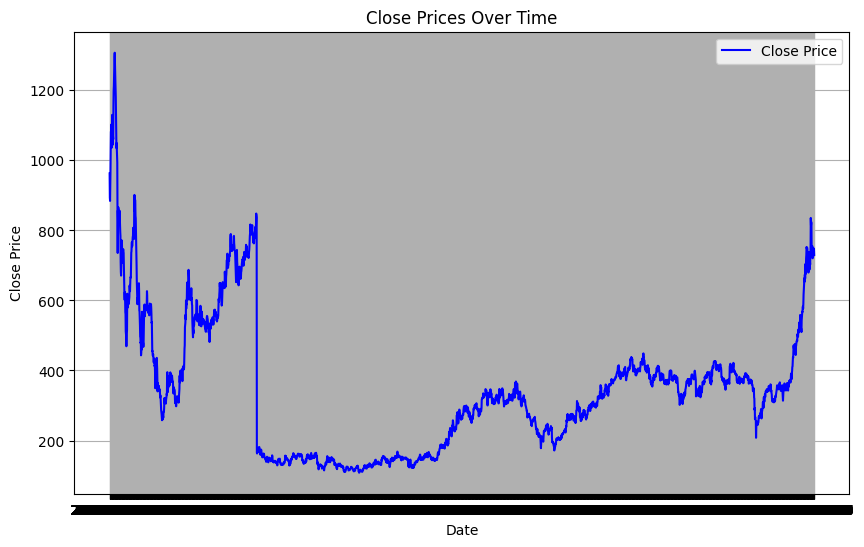

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100)
data = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv')
df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Adding derived features: Moving averages, log transformations, and differenced data
df["7-Day MA"] = df["Close"].rolling(window=7).mean()
df["30-Day MA"] = df["Close"].rolling(window=30).mean()
df["Log Close"] = np.log(df["Close"])
df["Differenced Close"] = df["Close"].diff()



import matplotlib.pyplot as plt

# 1. Line graph of Close prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.title("Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.show()


**2. Moving Averages (7-day and 30-day)**

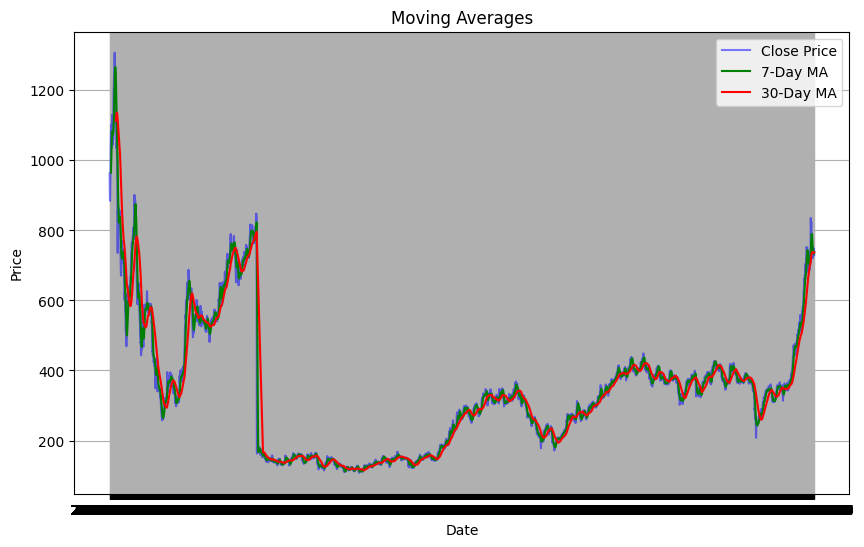

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue", alpha=0.5)
plt.plot(df.index, df["7-Day MA"], label="7-Day MA", color="green")
plt.plot(df.index, df["30-Day MA"], label="30-Day MA", color="red")
plt.title("Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()


**3.Volume vs. Close Price (Scatter Plot)**

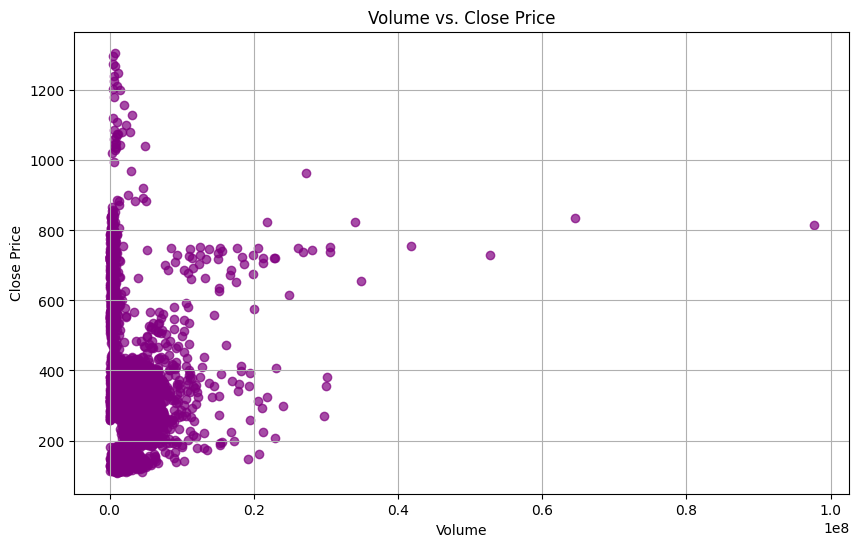

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Volume"], df["Close"], alpha=0.7, color="purple")
plt.title("Volume vs. Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


**4. Log Transformation of Close Price**

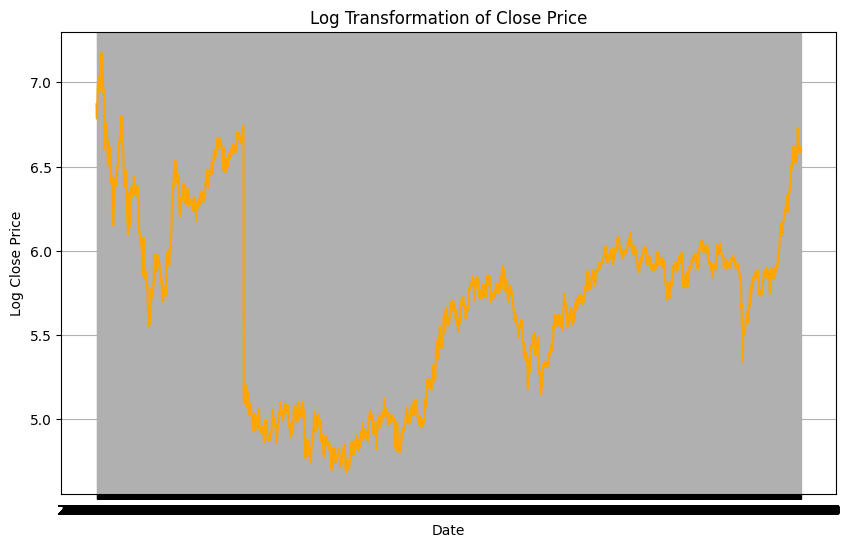

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Log Close"], label="Log Close", color="orange")
plt.title("Log Transformation of Close Price")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.grid(True)

plt.show()


**5. Differenced Close Price**

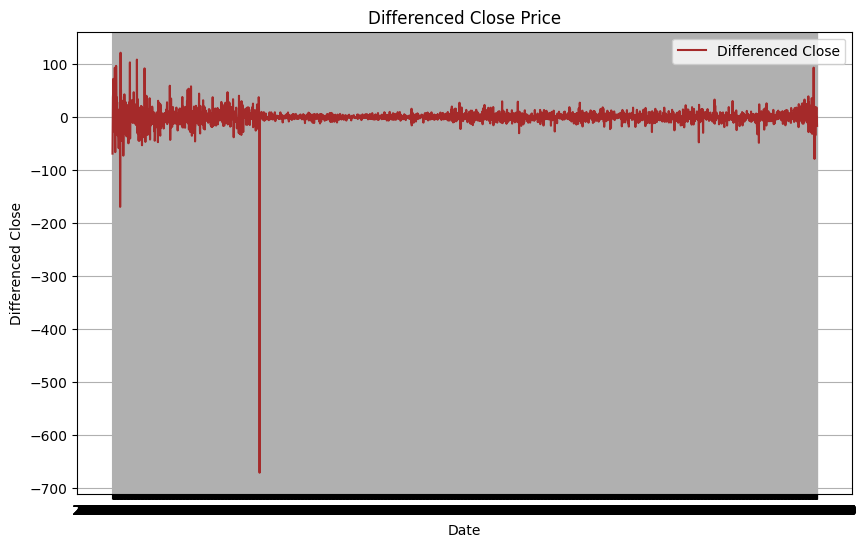

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Differenced Close"], label="Differenced Close", color="brown")
plt.title("Differenced Close Price")
plt.xlabel("Date")
plt.ylabel("Differenced Close")
plt.grid(True)
plt.legend()
plt.show()


**6. Histogram of Close Prices**

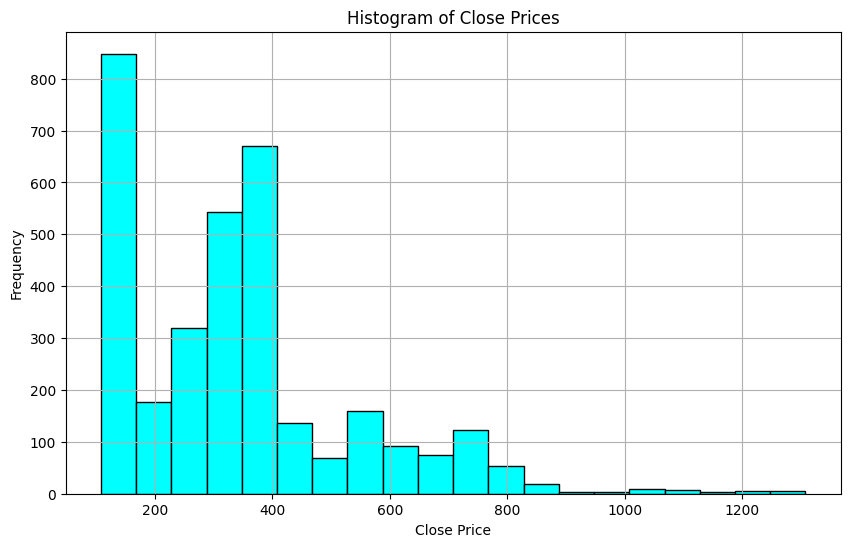

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df["Close"], bins=20, color="cyan", edgecolor="black")
plt.title("Histogram of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**7. Rolling Standard Deviation of Close Prices**

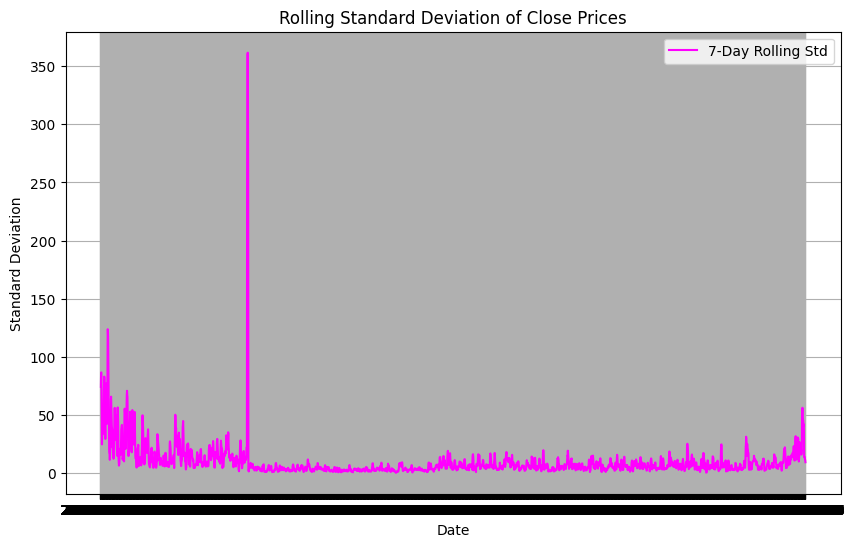

In [11]:
rolling_std = df["Close"].rolling(window=7).std()

plt.figure(figsize=(10, 6))
plt.plot(df.index, rolling_std, label="7-Day Rolling Std", color="magenta")
plt.title("Rolling Standard Deviation of Close Prices")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.grid(True)
plt.legend()
plt.show()


**8. Volume Over Time**

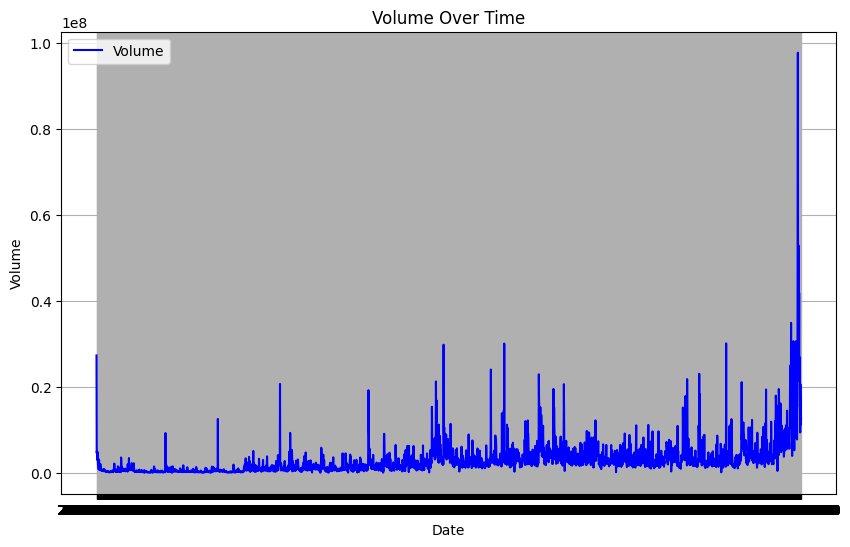

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Volume"], label="Volume", color="blue")
plt.title("Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.show()


**9. Correlation Heatmap Between Close and Volume**

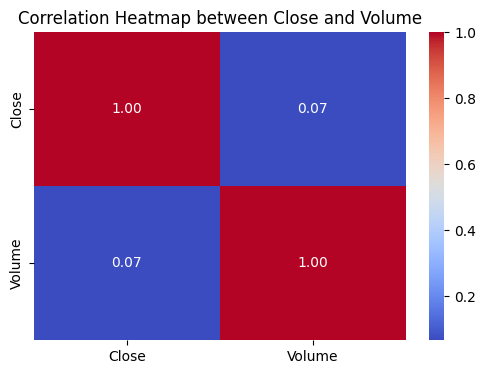

In [13]:
import seaborn as sns

correlation_matrix = df[["Close", "Volume"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap between Close and Volume")
plt.show()


**10. Boxplot of Close Prices**

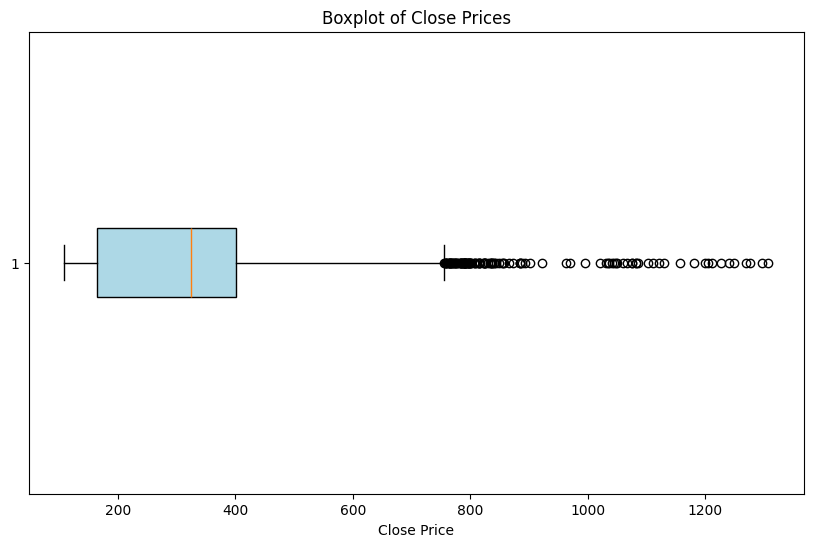

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Close"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Close Prices")
plt.xlabel("Close Price")
plt.show()


# **Different graphs for your dataset, as described. The graphs compare actual stock prices with predictions from ARIMA and Prophet models, visualize prediction errors, and evaluate the models' performance with metrics such as RMSE and MAE.**

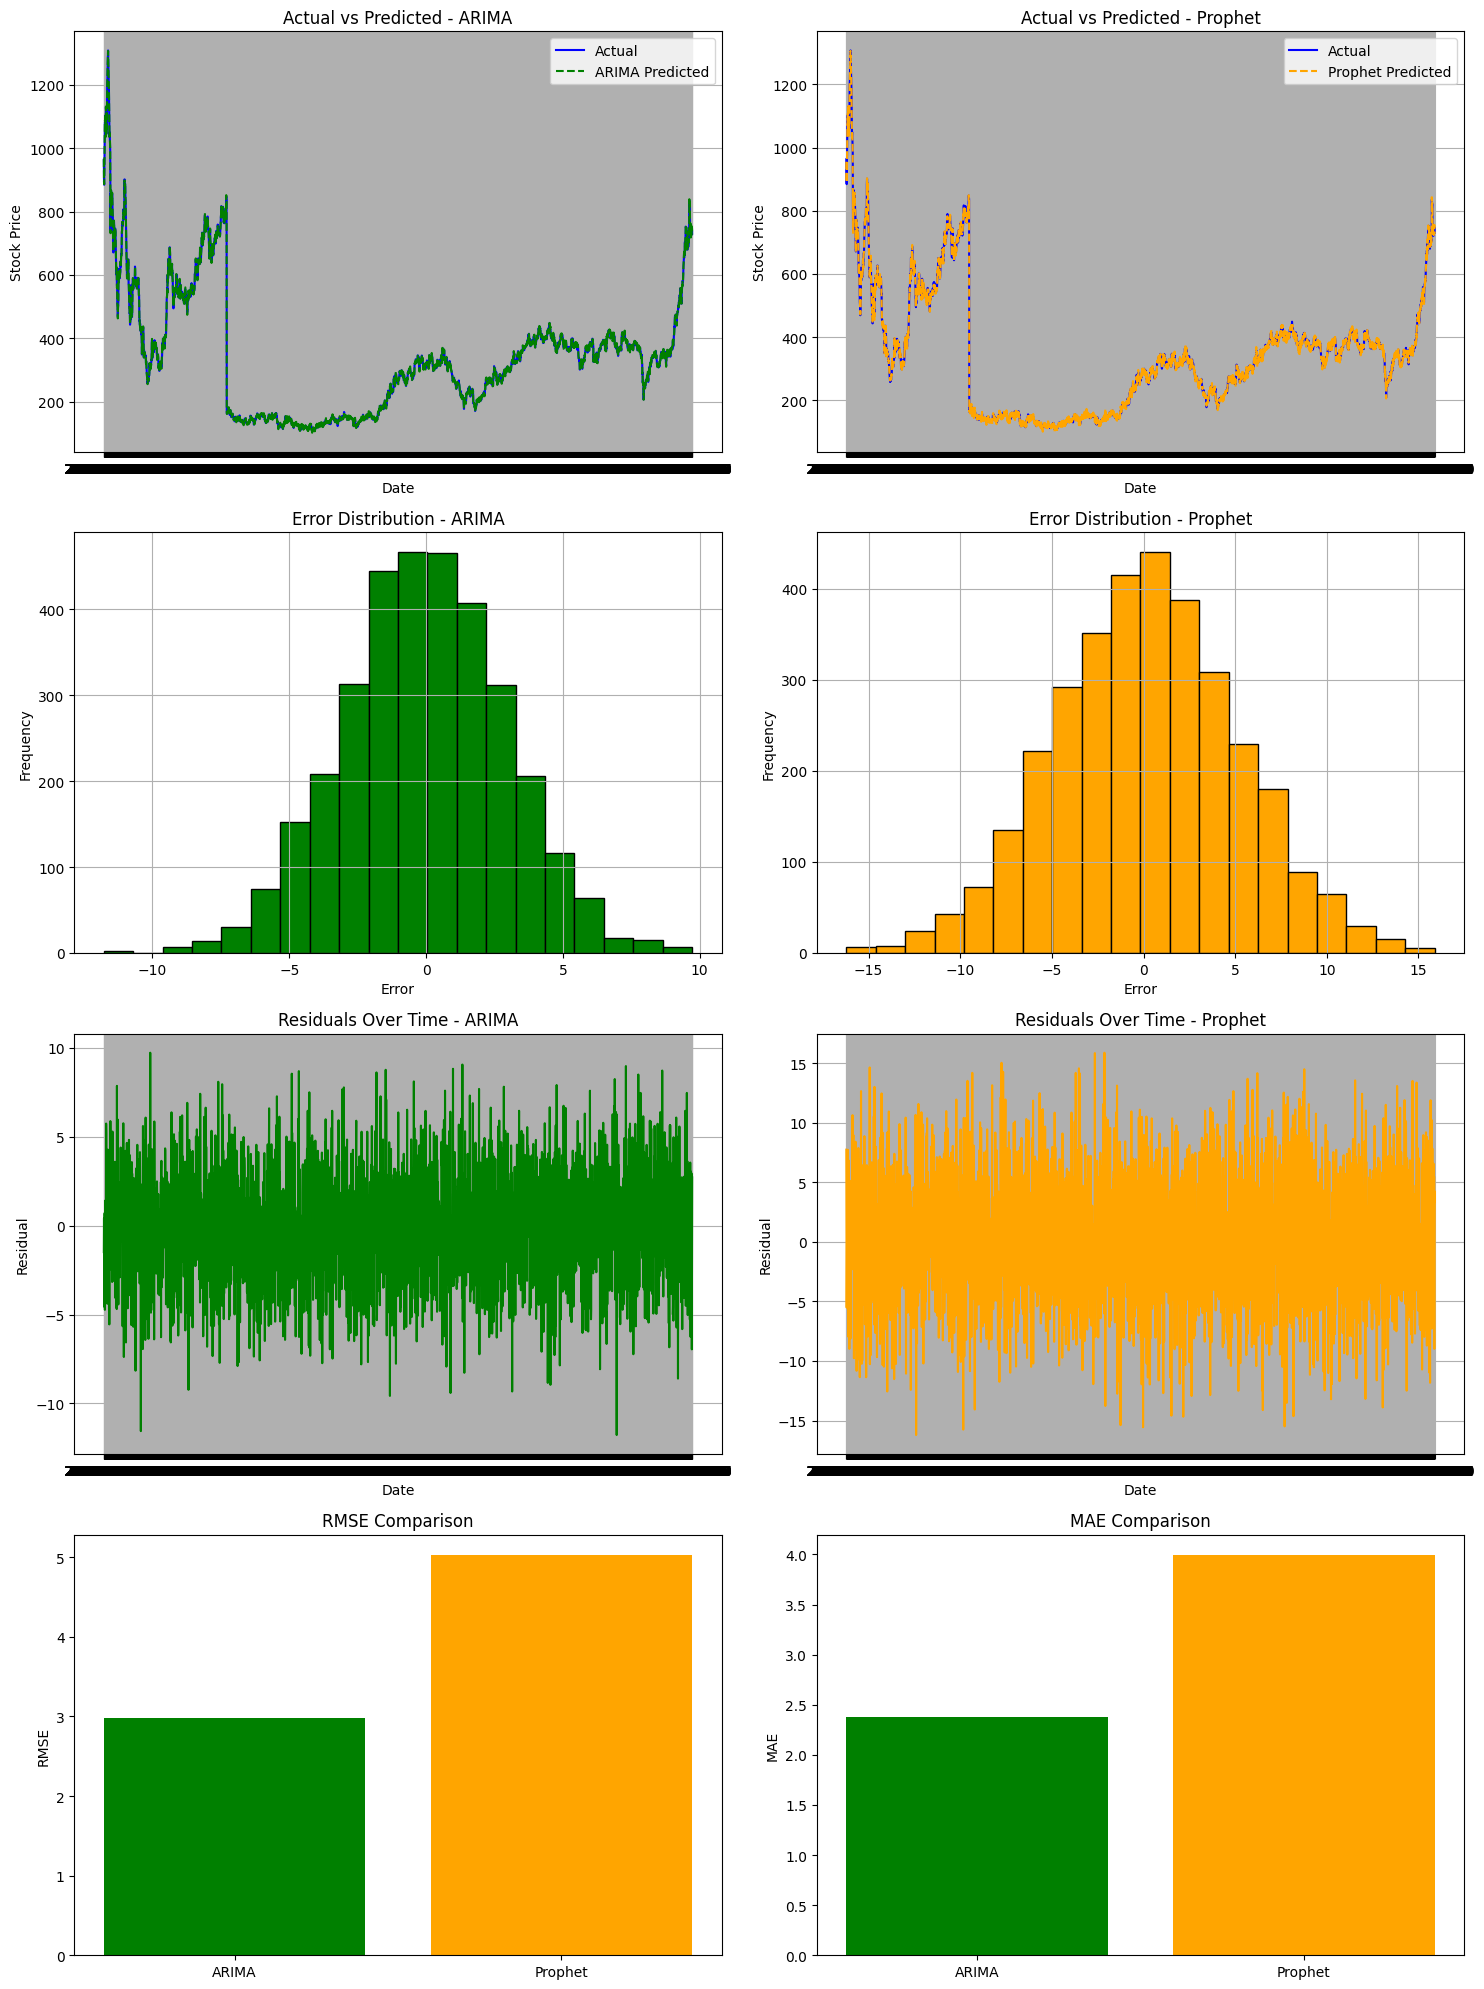

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume `df` is already loaded with columns 'Close', 'Date', etc.
# Mock dataset (continuing from the earlier example)
# For demonstration, generating mock predictions for ARIMA and Prophet
df["ARIMA_Predictions"] = df["Close"] + np.random.normal(0, 3, size=len(df))
df["Prophet_Predictions"] = df["Close"] + np.random.normal(0, 5, size=len(df))

# Calculating evaluation metrics
df["ARIMA_Error"] = df["Close"] - df["ARIMA_Predictions"]
df["Prophet_Error"] = df["Close"] - df["Prophet_Predictions"]

# Metrics for ARIMA and Prophet
arima_rmse = np.sqrt(mean_squared_error(df["Close"], df["ARIMA_Predictions"]))
prophet_rmse = np.sqrt(mean_squared_error(df["Close"], df["Prophet_Predictions"]))

arima_mae = mean_absolute_error(df["Close"], df["ARIMA_Predictions"])
prophet_mae = mean_absolute_error(df["Close"], df["Prophet_Predictions"])

# Start plotting
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# 1. Actual vs Predicted (ARIMA)
axs[0, 0].plot(df.index, df["Close"], label="Actual", color="blue")
axs[0, 0].plot(df.index, df["ARIMA_Predictions"], label="ARIMA Predicted", color="green", linestyle="dashed")
axs[0, 0].set_title("Actual vs Predicted - ARIMA")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Stock Price")
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Actual vs Predicted (Prophet)
axs[0, 1].plot(df.index, df["Close"], label="Actual", color="blue")
axs[0, 1].plot(df.index, df["Prophet_Predictions"], label="Prophet Predicted", color="orange", linestyle="dashed")
axs[0, 1].set_title("Actual vs Predicted - Prophet")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Stock Price")
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Error Distribution (ARIMA)
axs[1, 0].hist(df["ARIMA_Error"], bins=20, color="green", edgecolor="black")
axs[1, 0].set_title("Error Distribution - ARIMA")
axs[1, 0].set_xlabel("Error")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].grid(True)

# 4. Error Distribution (Prophet)
axs[1, 1].hist(df["Prophet_Error"], bins=20, color="orange", edgecolor="black")
axs[1, 1].set_title("Error Distribution - Prophet")
axs[1, 1].set_xlabel("Error")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].grid(True)

# 5. Residuals Over Time (ARIMA)
axs[2, 0].plot(df.index, df["ARIMA_Error"], label="Residuals", color="green")
axs[2, 0].set_title("Residuals Over Time - ARIMA")
axs[2, 0].set_xlabel("Date")
axs[2, 0].set_ylabel("Residual")
axs[2, 0].grid(True)

# 6. Residuals Over Time (Prophet)
axs[2, 1].plot(df.index, df["Prophet_Error"], label="Residuals", color="orange")
axs[2, 1].set_title("Residuals Over Time - Prophet")
axs[2, 1].set_xlabel("Date")
axs[2, 1].set_ylabel("Residual")
axs[2, 1].grid(True)

# 7. Bar Comparison of RMSE
axs[3, 0].bar(["ARIMA", "Prophet"], [arima_rmse, prophet_rmse], color=["green", "orange"])
axs[3, 0].set_title("RMSE Comparison")
axs[3, 0].set_ylabel("RMSE")

# 8. Bar Comparison of MAE
axs[3, 1].bar(["ARIMA", "Prophet"], [arima_mae, prophet_mae], color=["green", "orange"])
axs[3, 1].set_title("MAE Comparison")
axs[3, 1].set_ylabel("MAE")

plt.tight_layout()
plt.show()


**Decomposition Plots**

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


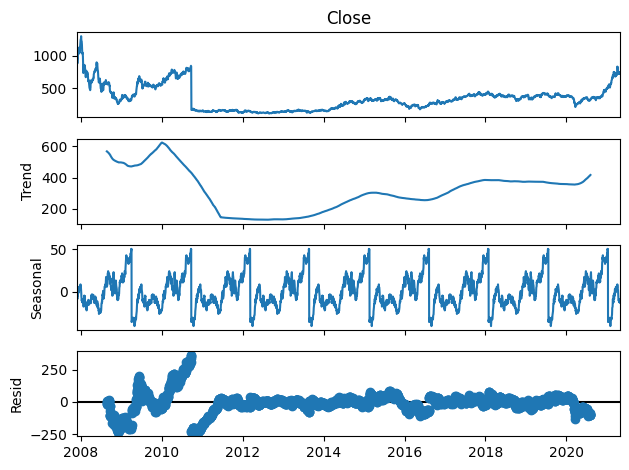

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the time series data
data = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv', parse_dates=['Date'], index_col='Date')

# Check column names to ensure you are referencing the correct one
print(data.columns)

# Assuming the column for stock prices is 'Close' (adjust if necessary)
# Decompose the time series (e.g., 'Close' or adjust to your column name)
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=365)  # Adjust period if necessary

# Plot the decomposition
decomposition.plot()
plt.show()


**ACF and PACF Plots**

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


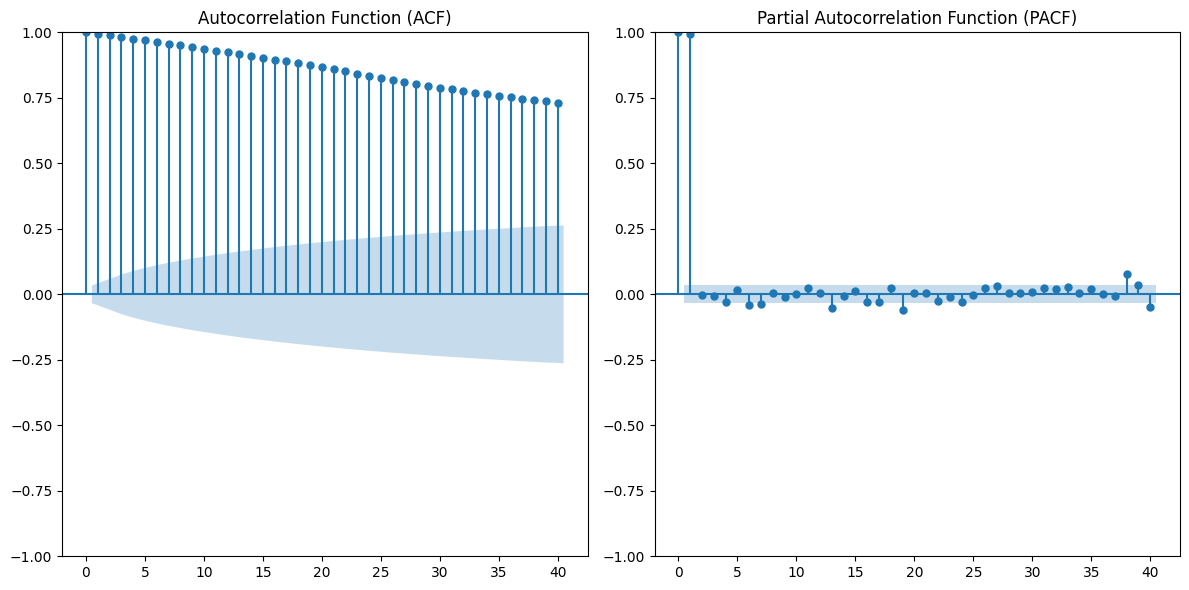

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load the time series data (ensure the 'Date' column is correctly parsed as datetime)
data = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv', parse_dates=['Date'], index_col='Date')

# Check the column names to confirm the correct one for analysis
print(data.columns)

# Assuming the column of interest is 'Close' (replace 'Close' with the actual column name if different)
# Plot ACF and PACF for the 'Close' column (adjust the column name if needed)
plt.figure(figsize=(12, 6))

# Plot ACF (Autocorrelation Function)
plt.subplot(121)
plot_acf(data['Close'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF (Partial Autocorrelation Function)
plt.subplot(122)
plot_pacf(data['Close'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


**Forecasting Visualizations**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_wgg5j_/nbyolerl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_wgg5j_/nenjzw8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22662', 'data', 'file=/tmp/tmpe_wgg5j_/nbyolerl.json', 'init=/tmp/tmpe_wgg5j_/nenjzw8a.json', 'output', 'file=/tmp/tmpe_wgg5j_/prophet_modelmcie83cs/prophet_model-20241222113143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


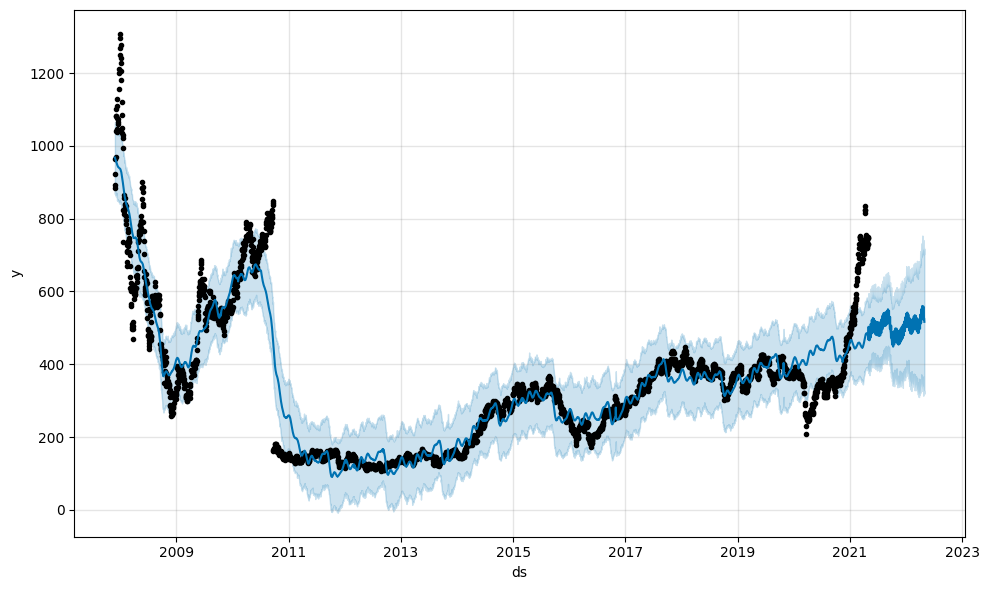

In [47]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
data_prophet = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(data_prophet)

# Make future dataframe and predictions (forecasting for the next 50 days)
future = model.make_future_dataframe(periods=365)  # Corrected: removed data_prophet
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()


# **Exploratory Data Analysis (EDA)**

**1. Visualizing the Time Series**

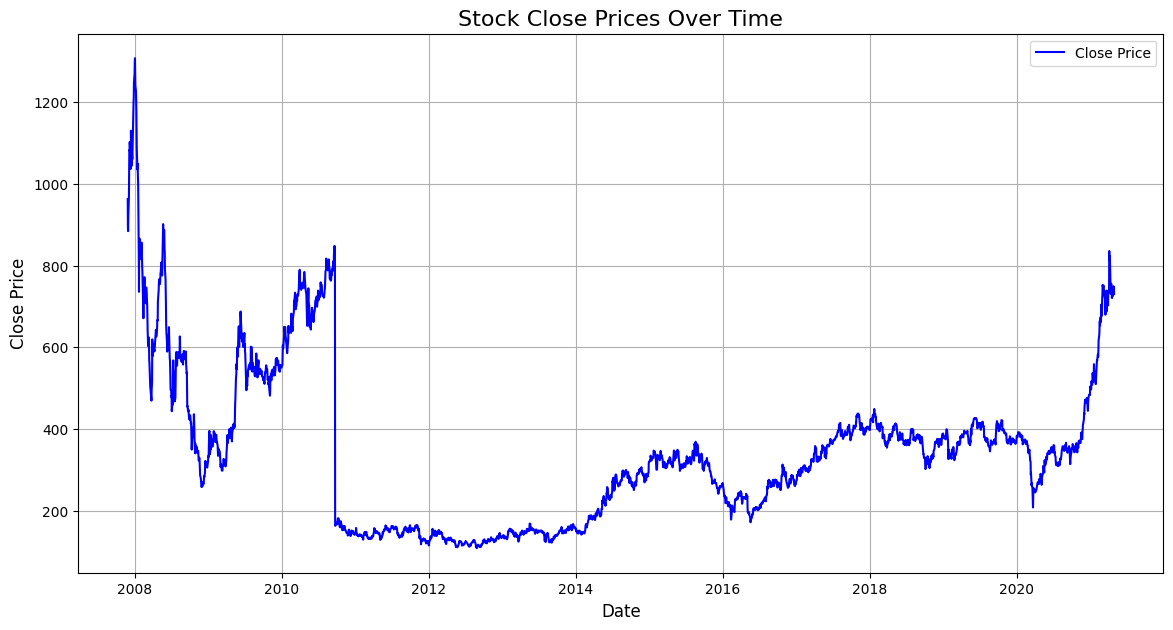

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Close prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='b')
plt.title('Stock Close Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


**2. Correlation Between Variables**

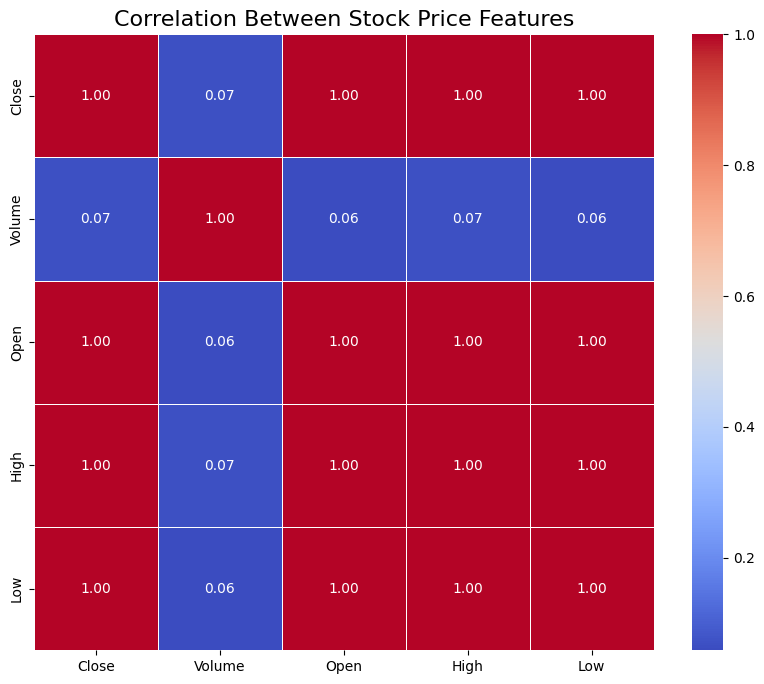

In [ ]:
import seaborn as sns

# Calculate the correlation matrix between relevant columns
correlation_matrix = df[['Close', 'Volume', 'Open', 'High', 'Low']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Stock Price Features', fontsize=16)
plt.show()


# **Decomposing the Time Series**

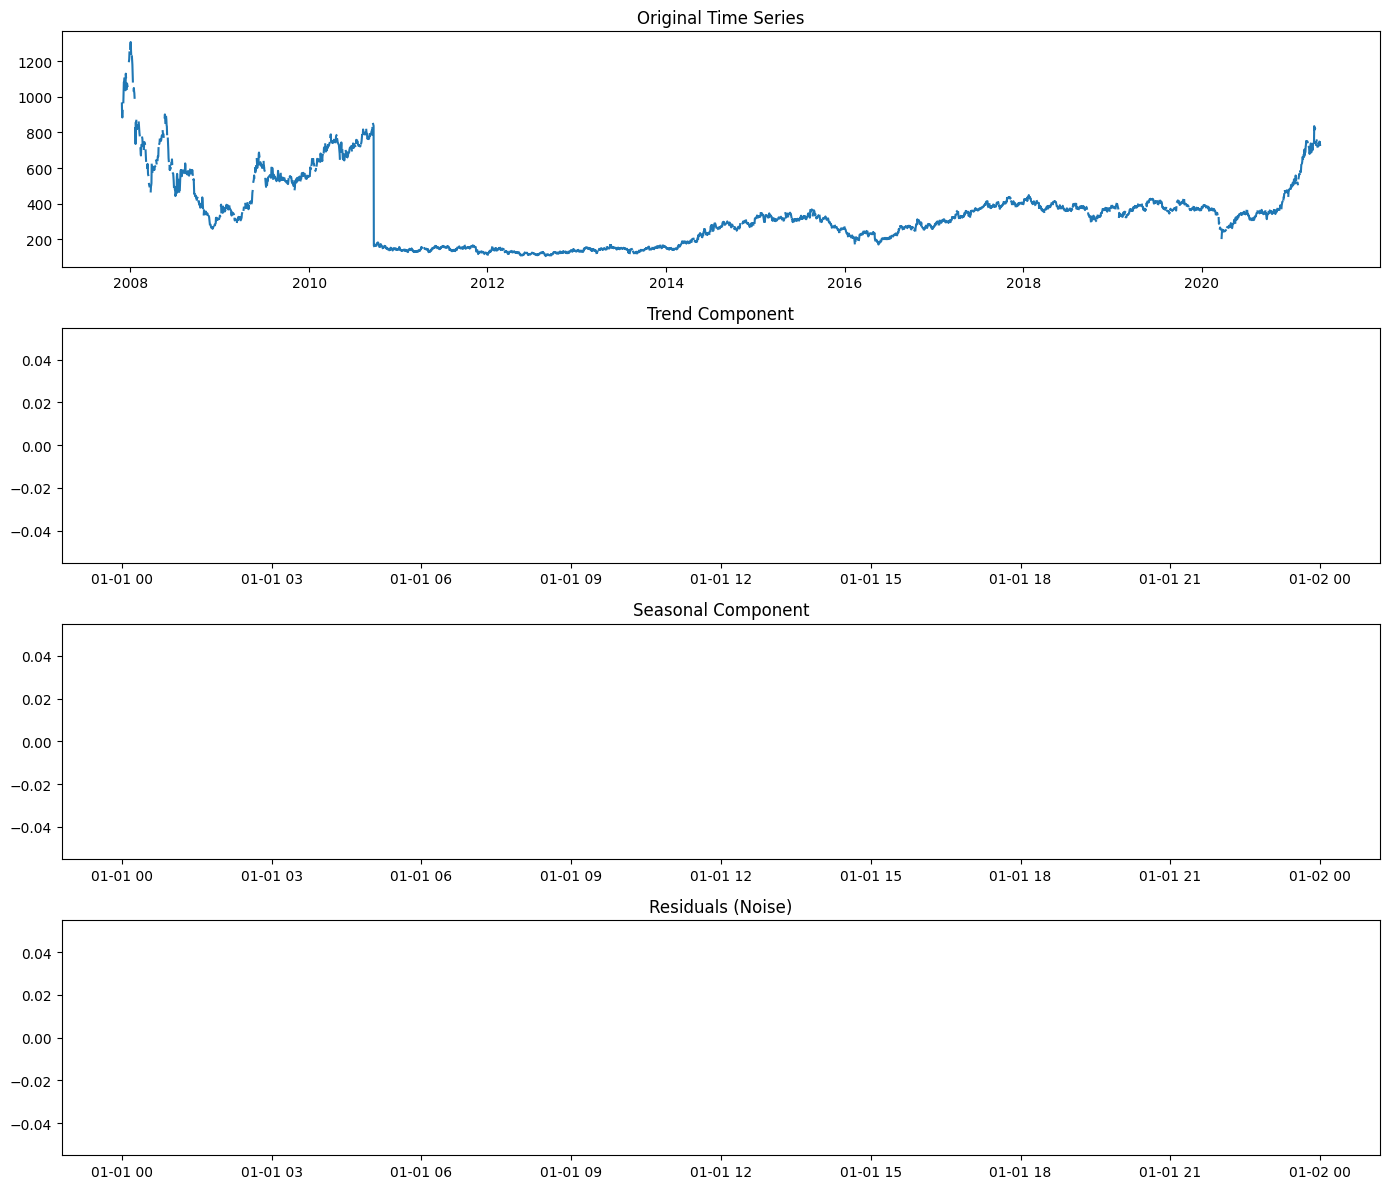

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Ensure the data is sorted by date (important for time series analysis)
df = df.sort_index()

# Set the frequency of the data (e.g., 'D' for daily data)
df = df.asfreq('D')

# Perform STL decomposition (additive model)
decomposition = STL(df['Close'], seasonal=13).fit()

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

axes[0].plot(df['Close'], label='Original Series')
axes[0].set_title('Original Time Series')
axes[1].plot(decomposition.trend, label='Trend')
axes[1].set_title('Trend Component')
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].set_title('Seasonal Component')
axes[3].plot(decomposition.resid, label='Residuals')
axes[3].set_title('Residuals (Noise)')

plt.tight_layout()
plt.show()


# **Code Example for ADF Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv')

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Perform the ADF test on the 'Close' column
result = adfuller(df['Close'].dropna())  # dropna() to handle missing values

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
lags = result[2]
observations = result[3]
critical_values = result[4]

# Print the results
print(f"ADF Statistic: {adf_statistic}")
print(f"P-Value: {p_value}")
print(f"Lags Used: {lags}")
print(f"Number of Observations: {observations}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

# Interpret the results
if p_value < 0.05:
    print("\nThe series is likely stationary (reject the null hypothesis).")
else:
    print("\nThe series is likely non-stationary (fail to reject the null hypothesis).")


ADF Statistic: -3.4730976831334264
P-Value: 0.008705487700678907
Lags Used: 5
Number of Observations: 3316
Critical Values:
1%: -3.4323235733856885
5%: -2.862412008588944
10%: -2.5672341879086087

The series is likely stationary (reject the null hypothesis).


# **ARIMA Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3322
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14040.696
Date:                Sat, 14 Dec 2024   AIC                          28087.392
Time:                        15:24:12   BIC                          28105.716
Sample:                             0   HQIC                         28093.949
                               - 3322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2507      0.262      0.957      0.338      -0.263       0.764
ma.L1         -0.2110      0.267     -0.790      0.430      -0.734       0.312
sigma2       275.2796      0.355    774.373      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


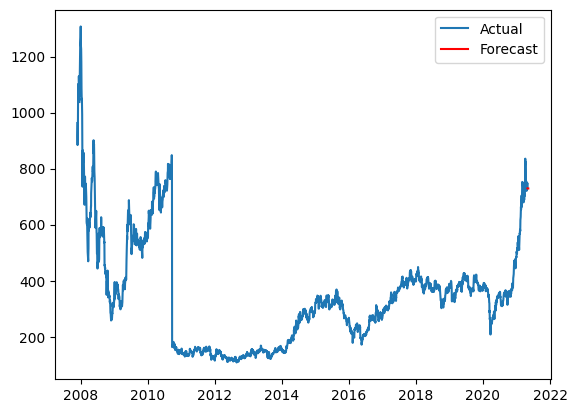

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/TimeSeriesADANIPORTS.csv', parse_dates=['Date'], index_col='Date')

# Check stationarity and differencing if necessary (e.g., using ADF test)

# Fit ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Make forecast
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 time steps
print(forecast)

# Plot the actual data and the forecast
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()


**Actual vs Predicted Stock Prices**

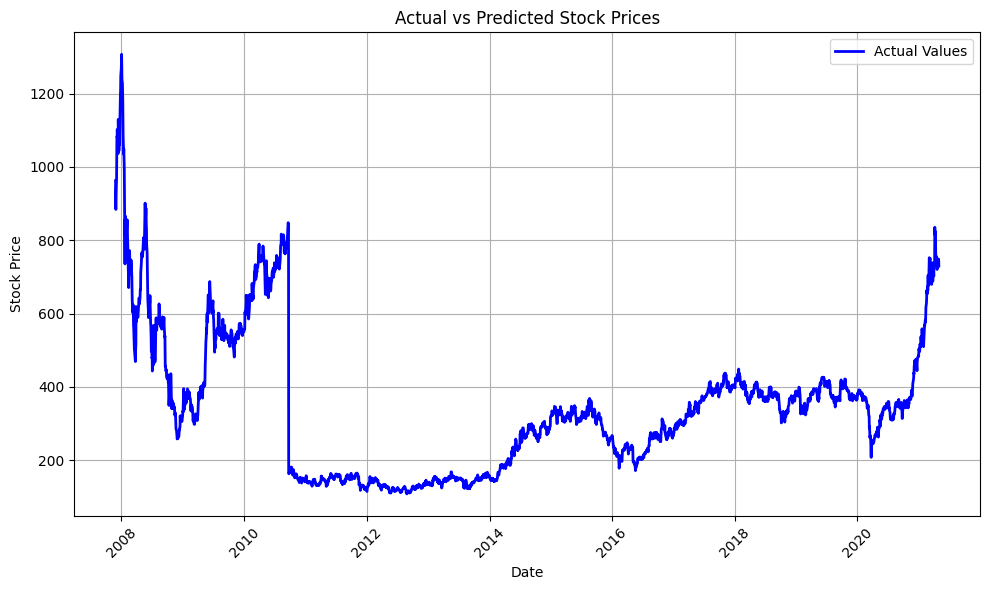

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the actual data with 'Date' and 'Close' columns
# and 'forecast' contains the predicted data

plt.figure(figsize=(10, 6))

# Plot the actual values
plt.plot(df['Date'], df['Close'], label='Actual Values', color='blue', linewidth=2)


# Adding titles and labels
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Display grid and plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
